## Set up

In [3]:
# 'pip': The PyPA recommended tool for installing Python packages
# the '!' runs the line the same as in the terminal

!pip install seaborn 

In [4]:
# imports a library 'pandas', names it as 'pd'

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

####What problem does pandas solve?

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

http://pandas.pydata.org/

In [5]:
# various options in pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

## Load a data set

"Census Income" dataset

http://archive.ics.uci.edu/ml/

In [6]:
# download the data and name the columns
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       names = cols)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

pandas can load a lot more than csvs, this tutorial shows how pandas can read excel, sql,
and even copy and paste...

http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/

## View

In [ ]:
# we can see there are no null values
# columns with numberical values are type int64, no need to set data type

df.info()

In [ ]:
# to view the first 5 or specify with ex: .head(10)
df.head()

In [ ]:
# there's a space before each string in this data
df.education.unique()

In [ ]:
# looks like it's in every object column
df.workclass.unique()

## Strip spaces in columns

In [ ]:
# loop through each column and strip all the spaces

for col in df:
    if df[col].dtype == 'O':
        df[col] = df[col].map(lambda x: x.strip(' '))

In [ ]:
# Here's a break down of what that for loop is doing

In [ ]:
# loops through df and gets the column names
for col in df:
    print col

In [ ]:
# gets the column type
df.education.dtype

In [ ]:
# if True then applys the map function
df.education.dtype == object

In [ ]:
# strip function
x = ' string'
x.strip(' ')

In [ ]:
# lambda creates a 'throw away' or 'anonymous' function
strip_string = lambda x: x.strip(' ')
strip_string(' string')

In [ ]:
# same as this
def strip_string2(x):
    x = x.strip(' ')
    return x

In [ ]:
strip_string2(' string')

In [ ]:
# map applies the function to each item in the data frame column so

df[col].map(lambda x: x.strip(' '))

# does the same thing as

df['workclass'].map(strip_string2)

# but in the first case we don't have to define and name a function

for more info on lambda and map

http://www.python-course.eu/lambda.php

## Descriptive 

In [ ]:
df.education.value_counts()

In [ ]:
df.hours_per_week.mean()

In [ ]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

## Find nulls

In [ ]:
# as we saw with df.info() there are no nulls... 
# but if there were this would find the rows where age is null
df[df.age.isnull()]

In [ ]:
# you could drop all those rows with
df_no_nulls = df[df.age.notnull()]

## Fill nulls

In [ ]:
null_df = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])

In [ ]:
null_df

In [ ]:
# you can also fill nulls with a value or string
null_df.column1.fillna(1000)

In [ ]:
null_df.column1.fillna(null_df.column1.median())

In [ ]:
null_df.column1.fillna('string')

## Selecting rows and columns 

In [ ]:
# select a row
df.iloc[0]

In [ ]:
# select a range of rows
df.iloc[10:15]

In [ ]:
# last 2 rows
df.iloc[-2:]

In [ ]:
# selecting every other row in columns 3-5
df.iloc[::2, 2:5].head()

In [ ]:
df.loc[0:2, ['age', 'relationship ']]

## Differences between .loc, .iloc, and .ix

http://pandas.pydata.org/pandas-docs/stable/indexing.html

by label

.loc[]

by integer position

.iloc[]

for both

.ix[]

In [ ]:
# pd.DataFrame let's you turn series, arrays, lists, and more into data frame structures

df_index = pd.DataFrame([[1,2,3,4],[2,4,6,8],[3,5,7,9]], [11,13,12], columns = ['A', 0, 1, 'B'])

In [ ]:
df_index

In [ ]:
# iloc indexes by postion, not by the labels in the index
df_index.iloc[0:1]

In [ ]:
# with loc both the start and the stop are included
df_index.loc[11:12]

In [ ]:
# select columns by position
df_index.iloc[:,0:1]

In [ ]:
# or by label
df_index.loc[:,0:1]

In [ ]:
# ix: primarily label based, but will fall back to integer positional access
df_index.ix[:,0:1]

## Rename columns

In [ ]:
df.columns

In [ ]:
# replace a column name
df.rename(columns = {'country_of_origin' : 'native_country'}, inplace = True)

## Boolean

In [ ]:
df.native_country.unique()

In [ ]:
df[df.native_country == 'United-States'].head()

In [ ]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].head()

In [ ]:
df[(df.native_country != 'United-States') & (df.education_num > 9)].income.value_counts()

## Groupby

In [ ]:
# How to groupby column and apply a function like sum, count, or mean
df.groupby(['relationship']).mean()

In [ ]:
# To groupby multiple columns with multiple functions attached
df.groupby(['income', 'native_country']).age.agg(['count', 'mean'])
# grouped in order of which column is listed first

In [ ]:
# combine groupby with boolean

df[df.native_country != 'United-States'].groupby(['education']).hours_per_week.mean()

## plotting with pandas

In [ ]:
df.age.hist(bins = 18);

In [ ]:
# split the histograms by another column (with relatively few unique values)
df.hours_per_week.hist(by = df.income, bins = 25, figsize = (10,5));

In [ ]:
# use value_counts() and a bar plot
df['workclass'].value_counts().plot(kind = 'bar')

In [ ]:
df.boxplot(['age'], by = 'relationship');

In [ ]:
df.plot(kind='scatter',
        x = 'age',
        y ='hours_per_week',
        alpha = .25,
        figsize = (10,5))

## Practice Exercises

In [ ]:
# how many males and females are in this data set
#Boolean Mask + Count

In [57]:

print 'There are {} males and {} females.'.format(df.gender[df.gender == 'Male'].count(), df.gender[df.gender == 'Female'].count())

There are 21790 males and 10771 females.


In [58]:
# plot the total number of people in each occupation
# Select Col + Value Count + Plot

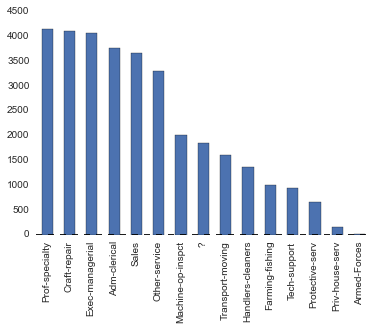

In [59]:
df.occupation.value_counts().plot(kind = 'bar')

In [60]:
# what is the lowest average age of an occupation
# Group By Col + Select Col + Mean + Min

In [61]:
df.groupby(['occupation']).age.mean().min()

30.222222222222221

In [62]:
# create a boxplot of hours per week by education level
# Boxplot + Select Col by Col

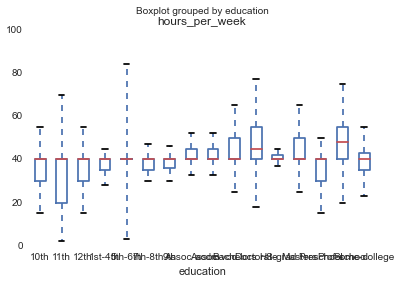

In [63]:
df.boxplot('hours_per_week', by = 'education')

In [64]:
# create a new column for income where >50K = 1 and <=50K = 0

# hint... http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

In [80]:
df['income_50K'] = df['income'].replace({'>50K': 1, '<=50K':0}, inplace=False)
# df['income_50K'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

#Validate:
# df.income.value_counts()
df['income_50K'].value_counts()

0    24720
1     7841
dtype: int64

In [64]:
# find which "native_country" has the highest percent of people earning >50K

In [104]:
df.groupby('native_country').income_50K.mean().sort(inplace=False)[-1:]


# df /float(len())

native_country
Iran              0.42
Name: income_50K, dtype: float64

In [66]:
# visualize what percent of people earn over 50K by education level

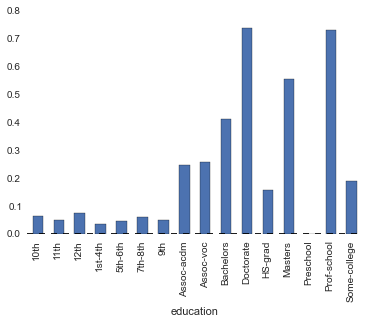

In [106]:
df.groupby('education').income_50K.mean().plot(kind='bar')

## Extra practice

In [ ]:
# make a hexbin plot

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [68]:
# check out plotting with Seaborn

http://nbviewer.ipython.org/gist/mwaskom/8224591

http://stanford.edu/~mwaskom/software/seaborn/tutorial/plotting_distributions.html